# Задание по EM-алгоритму

__Предупреждение про списывание.__ Строго запрещается использовать код других студентов в своем решении. Код из открытых источников разрешается брать только фрагментами по одной строке (например, скопировать пример использования какой-то функции), нельзя копировать код по несколько строк. В случае обнаружения похожих решений выставляется 0 за __все__ задание __обоим__ студентам, чьи работы являются похожими, и подается служебная записка в деканат.

## Общая постановка задачи

Представим, что нам задана вероятностная модель в следующем виде:
$$
p(X, Z \mid \theta) = \prod\limits_{i = 1}^{n}p(x_i, z_i \mid \theta) = \prod\limits_{i = 1}^{n}p(x_i \mid z_i, \theta)p(z_i \mid \theta),
$$

то есть мы работаем с набором из пар $(x_i, z_i)_{i = 1}^{n}$. При этом, мы делаем предположение, что переменные $z_i$ мы не наблюдаем (их нет в датасете), при этом наблюдаем $x_i$ и хотим найти параметры $\theta$, максимизирующие правдоподобие сгенерированных $x_i$:

$$
p(X \mid \theta) = \prod\limits_{i = 1}^{n}p(x_i \mid \theta) \rightarrow \max\limits_{\theta}
$$

То есть, постановка задачи -- найти оценку максимального правдоподобия для определенного семейства распределений, заданного по формуле

$$
p(x_i \mid \theta) = \int p(x_i, z_i \mid \theta) d z_i = \int p(x_i \mid z_i, \theta) p(z_i \mid \theta) d z_i. 
$$
 
Здесь мы воспользовались правилом суммы (чтобы найти плотность величины из совместной плотности, нужно проинтегрировать по лишним величинам). 

Что это такое с практической точки зрения? Мы предполагаем, что объект $x_i$ был сгенерирован с помощью "иерархической" процедуры, в которой сначала генерируется ненаблюдаемая переменная $z_i$, а потом уже генерируется сам объект $x_i$, обусловившись на ненаблюдаемый фактор $z_i$, ну и, конечно, параметры $\theta$.

## ЕМ-алгоритм

Из-за того, что распределение $p(x_i \mid \theta)$ может быть довольно сложно устроено для аналитического нахождения максимума правдоподобия, предлагается использовать ЕМ-алгоритм. Его общая схема -- ит

* Е-шаг -- поиск апостериорной плотности ненаблюдаемых переменных $Z = (z_1, \ldots, z_n)$:

$$
q(Z) = p(Z \mid X, \theta) = \prod\limits_{i = 1}^{n} p(z_i \mid x_i, \theta)
$$

* М-шаг -- при зафиксированной апостериорной плотности $q(Z)$ максимизируем по параметрам следующий функционал:

$$
\mathbb{E}_{q(Z)}p(X, Z \mid \theta) \rightarrow \max\limits_{\theta}
$$

!Важно!, что на М-шаге считается, что $q(Z)$ не зависит от параметров $\theta$. На лекции было показано, что полученные после $n$-го М-шага параметры $\theta_n$ имеют не меньшее правдоподобие, чем $\theta_{n-1}$, то есть $p(X \mid \theta_n) \geq p(X \mid \theta_{n-1})$, что обеспечивает сходимость алгоритма к некоторому локальному оптимуму.

## Смесь гауссиан

Основной для нас пример -- смесь гауссиан. В ней мы предполагаем, что заданы $K$ "кластеров", каждый из $k = 1, \ldots, K$ которых задается нормальным распределением $\mathcal{N}(\mu_k, \Sigma_k)$, и процедура генерации выглядит следующим образом:

* При генерации $x_i$ сначала генерируем кластер $z_i \sim Cat(\pi_1, \ldots, \pi_K)$, то есть, генерируем индекс кластера с вероятностями $p(z_i = k \mid \pi) = \pi_k$. Здесь $\pi$ -- вектор, состоящий из вероятностей сгенерировать конкретный кластер, который, в том числе, будет настраиваться в процессе максимизации правдоподобия (то есть, у нас будет большой набор параметров $\theta$, среди которых в том числе будет $\pi$). В терминах плотности:

$$ p(z_i \mid \theta) = \pi_{z_i} = \prod\limits_{k = 1}^{K} \left[\pi_k\right]^{I\{z_i = k\}}$$

* После выбора кластера $z_i$ для $i$-го объекта генерируем $x_i$ из соответствующего нормального распределения:

$$p(x_i \mid z_i, \theta) = \mathcal{N}(x_i \mid \mu_{z_i}, \Sigma_{z_i}) = \prod\limits_{k = 1}^{K}\left[\mathcal{N}(x_i \mid \mu_k, \Sigma_k)\right]^{I\{z_i = k\}}$$

Таким образом, у нас довольно внушительный набор параметров: вероятности кластеров $\pi = (\pi_1, \ldots, \pi_K)$, средние $\mu = (\mu_1, \ldots, \mu_K)$ и матрицы ковариации $\Sigma = (\Sigma_1, \ldots, \Sigma_K)$ каждого кластера $k = 1, \ldots K$.

При выписывании распределений мы использовали трюк с индикатором: если $z_i$ задает индекс, и нам нужно взять некоторое значение с этим индексом, это то же самое, что перебрать все возможные индексы $z_i = 1 \ldots K$, и взять произведение этих значений в степени 0 для индексов, не равных $z_i$ и в степени 1 для индекса, равного $z_i$.

Тогда совместное распределение на наблюдаемые и скрытые объекты имеет вид 

$$
p(X, Z \mid \theta) = \prod\limits_{i = 1}^{n}p(x_i, z_i \mid \theta) = \prod\limits_{i = 1}^{n}p(x_i, z_i \mid \theta) = \prod\limits_{i = 1}^{n}p(x_i \mid z_i, \theta)p(z_i \mid \theta) = \prod\limits_{i = 1}^{n}\prod\limits_{k = 1}^{K} \left[ \pi_k \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right]^{I\{z_i = k\}}
$$

Из этого, в частности, следует, что маргинальное распределение $i$-го объекта имеет вид (если хочется проверить, то будет как упражнение):
$$
p(x_i \mid \theta) = \sum\limits_{k = 1}^{K} \pi_k \mathcal{N}(x_i \mid \mu_k, \Sigma_k)
$$

То есть, плотности каждого кластера сложили с весами, равными вероятности попасть в кластер. Это и называется смесью (в данном случае, смесью гауссиан).

## ЕМ-алгоритм для смеси гауссиан

Теперь распишем формулы ЕМ-алгоритма для смеси гауссиан.

### Е-шаг

Здесь мы хотим найти апостериорное распределение $p(Z \mid X, \theta)$. Из независимости элементов выборки это то же самое, что найти $p(z_i \mid x_i, \theta)$ для каждой скрытой переменной в отдельности и сказать, что их совместное распределение при фиксированном $X$ равно 
$$
p(Z \mid X, \theta) = \prod\limits_{i = 1}^{n}p(z_i \mid x_i, \theta)
$$

Каждый $z_i$ -- индекс кластера, принимающий значения $1, \ldots, K$. Тогда для нахождения апостериорного распределения достаточно посчитать $p(z_i = k \mid x_i, \theta)$. Оно будет равно:

$$
p(z_i = k \mid x_i, \theta) = \frac{\pi_k \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum\limits_{j = 1}^{K}\pi_j \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$

Как такое считать на практике? Заметим, что для полного задания распределения нам нужно посчитать $p(z_i = k \mid x_i, \theta)$ для каждой пары индексов $i, k$, то есть, посчитать апостериорную вероятность того, что $i$-й объект был сгенерирован из $k$-го кластера. Это удобно оформить в виде хранения матрицы
$$Q = (q_{ik})_{i = 1\ldots n}^{k = 1\ldots K} \in \mathbb{R}^{n \times k}, \:\: q_{ik} = p(z_i = k \mid x_i, \theta)$$

### М-шаг

Если провести аналитическую оптимизацию функционала из М-шага, получится:

$$
\pi_k = \frac{\sum\limits_{i = 1}^{n}q_{ik}}{\sum\limits_{i = 1}^{n}\sum\limits_{k = 1}^{K}q_{ik}} = \frac{\sum\limits_{i = 1}^{n}q_{ik}}{n}
$$

$$
\mu_k = \frac{\sum\limits_{i = 1}^{n} q_{ik}x_i}{\sum\limits_{i = 1}^{n} q_{ik}}
$$

$$
\Sigma_k = \frac{\sum\limits_{i = 1}^{n} q_{ik}(x_i - \mu_k)(x_i - \mu_k)^{T}}{\sum\limits_{i = 1}^{n} q_{ik}}
$$

Таким образом, на практике нам нужно поддерживать еще три тензора: $\pi \in \mathbb{R}^{K}$, $\mu \in \mathbb{R}^{n \times d}$ и $\Sigma \in \mathbb{R}^{n \times d \times d}$, где $d$ -- размерность объектов: $x_i \in \mathbb{R}^{d}$.

Все записанные формулы можно довольно удобно записать в виде векторизованных операций с numpy массивами.

#### Лирическое отступление

Заметим, что на $M$-шаге все формулы имеют вид некоторого взвешенного среднего с коэффициентами, равными $$\frac{q_{ik}}{\sum\limits_{i = 1}^{n}q_{ik}}$$

Если мы упростим процедуру, зафиксировав во всех нормальных распределениях одинаковую матрицу ковариации $\Sigma_k = I$, а на Е-шаге будем считать не честное апостериорное распределение $p(z_i = k \mid x_i, \theta)$, а распределение, вырожденное в точке, соответствующей самому правдоподобному кластеру: $z_i = \arg\max_k p(x_i \mid z_i = k, \theta)$, то получим интересную интерпретацию. 

Заметим, что процедуры выбора кластера $z_i = \arg\max_k p(x_i \mid z_i = k, \theta)$ в случае $p(x_i \mid z_i = k, \theta) = \mathcal{N}(x_i \mid \mu_k, I)$ в точности соответствует выбору $\mu_k$, максимально близкого к $x_i$, так как правдоподобие пропорционально $\exp(-\frac{1}{2} \| x_i - \mu_k \|^2)$, что при логарифмировании и взятии минуса, чтобы превратить максимизацию в минимизацию как раз соответствует $\arg\min_k \frac{1}{2}\|x_i - \mu_k \|^2$. А это в точности первый шаг алгоритма $k$-means для кластеризации: относим каждый объект к ближайшему "центроиду" $\mu_k$.

В таком случае $q_{ik} = I\{z_i = k\}$ -- вырожденное распределение, сосредоточенное в индексе выбранного кластера, и формулы для средних с М-шага превратятся в:

$$
\mu_k = \frac{\sum\limits_{i = 1}^{n} q_{ik}x_i}{\sum\limits_{i = 1}^{n} q_{ik}} = \frac{\sum\limits_{i = 1}^{n} I\{z_i = k\}x_i}{\sum\limits_{i = 1}^{n}I\{z_i = k\}} = \frac{1}{n_k} \sum\limits_{i \in \text{кластер k}}x_i,
$$

то есть наша оценка среднего превращается в среднее по объектам, отнесенным к $k$-му кластеру. Это в точности соответствует второму шагу алгоритма $k$-means, в котором центр кластера формируется как среднее по объектам, отнесенным к этому кластеру.

Получается, что ЕМ-алгоритм для смеси гауссиан -- обобщение метода $k$-means, в котором появляется гораздо больше степеней свободы: оптимизируются матрицы ковариации $\Sigma_k$, оцениваются "априорные" вероятности принадлежать каждому из кластеров $\pi_k$, а на первом шаге мы делаем "мягкую" кластеризацию, считая вероятности объекта принадлежать каждому кластеру $q_{ik}$ вместо отнесения объектов к ближайшему центроиду.

## Практическая часть

В этом задании вам предстоит реализовать EM-алгоритм для разделения смеси многомерных гауссиан, протестировать реализацию на синтетических данных и изображениях цифр и проанализировать результаты.

### Генерация синтетических данных

Для целей отладки будем использовать синтетические данные. Сгенерируем их с помощью sklearn:

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'feature 2')

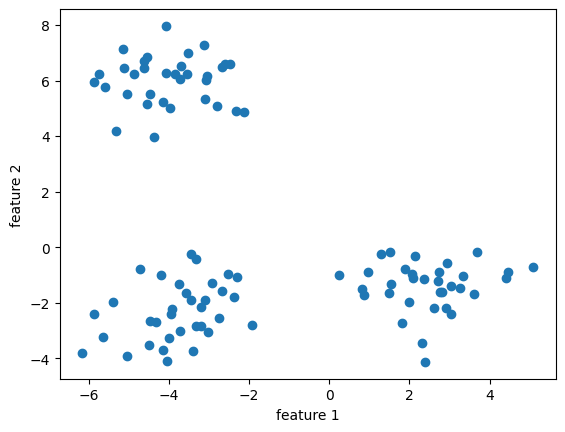

In [115]:
X, y = make_blobs()
plt.scatter(*X.T)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

Если у вас сгенерировались "слипшиеся" гауссианы, перезапустите ячейку.

### Реализация EM-алгоритма для разделения смеси гауссиан

Как и при реализации многих других алгоритмов машинного обучения, нашим основным инструментом будет модуль numpy:

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

__Задание 1. (6 баллов, выставляются только при наличии визуализации в следующей задаче)__ Реализуйте EM-алгоритм, следуя интерфейсу sklearn, см. прототип ниже. EM-алгоритм описан на слайде 48 в [презентации](https://github.com/ftad/BM2020/blob/master/materials/presentation_EM_ftad.pdf).

* Один из шагов EM-алгоритма разделения смеси включает подсчет матрицы ковариации. С этим поможет функция [np.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html), пример использования дан ниже. Посмотрите документацию функции и обратите внимание на параметр, позволяющий задавать веса объектов! С его помощью можно будет удобно обработать домножение на $q_{ik}$.
* Один из шагов EM-алгоритма включает подсчет плотности многомерного нормального распределения. С этим поможет функция [scipy.stats.multivariate_normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).
* Чтобы избежать ошибки Singular matrix, сообщающей, что у какой-то гауссианы получилась вырожденная матрица ковариации, прибавляйте к вычисляемым матрицам ковариации единичную матрицу, умноженную на небольшой коэффициент (cov_reg в реализации).

Вов всех заданиях ниже рекомендуется использовать гиперпараметры, заданные по умолчанию, если не указано иное.

In [5]:
# example with np.cov
np.cov(X, rowvar=False)

array([[ 1.21229563,  0.86666018],
       [ 0.86666018, 15.07342173]])

In [336]:
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator

class GMM(BaseEstimator):
    ### num_clusters corresponds to K in formulas
    def __init__(self, num_clusters=3, num_iters=100, cov_reg=1e-6):
        self.num_clusters = num_clusters
        self.num_iters = num_iters
        self.cov_reg = cov_reg

    ### num_objects corresponds to n in formulas
    ### num_features corresponds to d in formulas
    def fit_transform(self, X):
        """
        * input: data matrix X, shape: [num_objects, num_features]
        
        The method runs EM-algorithm to fit 
        a mixture of multinomial Gaussians on data.
        At the end of running, the following atributes should be learned:
        * self.mu: Gaussians' means, shape: [num_clusters, num_features]
        * self.sigma: Gaussians' covariance matrices, 
                      shape: [num_clusters, num_features, num_features]
        * self.pi: prior misture weights, shape: [num_clusters]
                   self.pi should sum to 1
        The code for attribute initialization is given below
        
        The method returns:
        * Q: posterior distribution over Gaussians for each objects,
             shape: [num_objects, num_clusters]
        """
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.mu = 2*np.random.rand(self.num_clusters, self.d) - 1
        self.sigma = np.concatenate([np.eye(self.d)[None, :, :] \
                     for k in range(self.num_clusters)], axis=0)
        self.pi = np.random.rand(self.num_clusters)
        self.pi /= self.pi.sum()
        
        ### your code below ###
        help_matrix = self.sigma * self.cov_reg
        for _ in range(self.num_iters):
            # Е-шаг
            p_numerators = np.vstack([self.pi[k] * multivariate_normal.pdf(X, self.mu[k], self.sigma[k], allow_singular=True) for k in range(self.num_clusters)])
            self.q = (p_numerators / p_numerators.sum(axis=0))

            # M-шаг
            self.pi = self.q.sum(axis=1) / self.n
            self.pi /= self.pi.sum()

            self.mu = (self.q.dot(X).T / self.q.sum(axis=1)).T
            self.sigma = np.array([np.cov(X, rowvar=False, aweights=self.q[k]) for k in range(self.num_clusters)])
        return self.q

### Тестирование EM-алгоритма на синтетических данных

__Задание 2 (1 балл, включая вопрос ниже).__ Протестируйте вашу реализацию на синтетических данных, сгенерированных выше в ноутбуке: запустите алгоритм на данных X с числом гауссиан, равным 3, __визуализируйте__, к какому кластеру отнесен каждый объект (получится трехцветный scatter-plot в осях двух признаков), а также __визуализируйте__ средние обученных гауссиан (на этом же графике). Чтобы определить принадлежность объекта к кластеру, используйте максимум апостериорной вероятности. Для получения хорошего результата может понадобиться перезапустить EM-алгоритм из другой начальной инициализации.

In [234]:
gmm = GMM()
q = gmm.fit_transform(X)

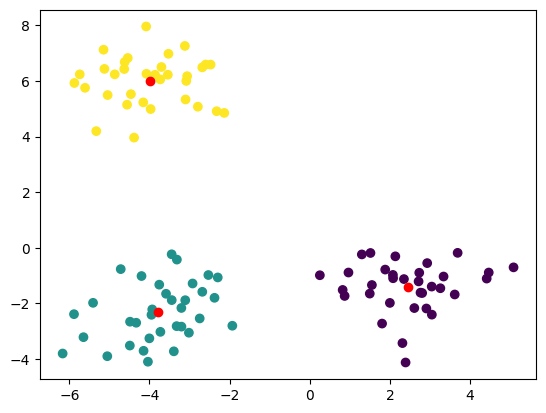

In [280]:
plt.scatter(*X.T, c=q.argmax(axis=0))
plt.scatter(*(q.dot(X).T / q.sum(axis=1)), color='red')
plt.show()

__Вопрос:__ получились ли матрицы ковариации, близкие к тем, которые использовались при генерации случайных данных?

__Ответ:__ 

In [281]:
### your code here (for question)
sigma = np.array([np.cov(X, rowvar=False, aweights=q[k]) for k in range(3)])
sigma

array([[[1.19476638e+00, 5.04511078e-02],
        [5.04511078e-02, 7.77341514e-01]],

       [[1.06978037e+00, 3.86036239e-01],
        [3.86036239e-01, 1.09906831e+00]],

       [[1.08778171e+00, 9.15635751e-04],
        [9.15635751e-04, 7.74542577e-01]]])

In [300]:
np.cov(X, rowvar=False)

array([[10.10156063, -4.66785558],
       [-4.66785558, 14.80069783]])

Матрицы ковариаций значительно отличаются.

EM-алгоритм выполняет "мягкую" кластеризацию: для каждого объекта определяется, с какой вероятностью он принадлежит к каждому из кластеров, вместо того, чтобы выбирать один кластер ("жесткая" кластеризация). Чтобы иллюстрировать это свойство, используем EM-алгоритм для разделения двух близко расположенных гауссиан. Сгенерируем такие данные:

Text(0, 0.5, 'feature 2')

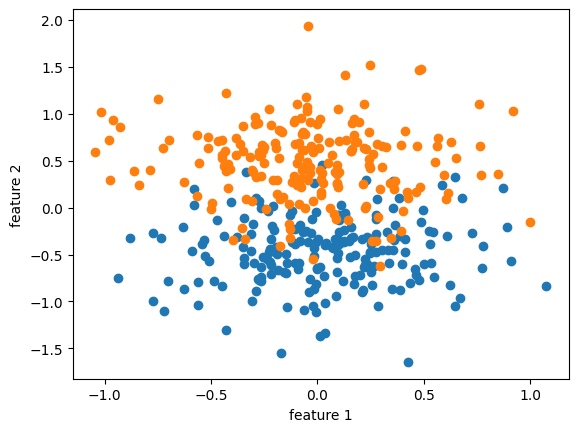

In [324]:
X0 = np.random.multivariate_normal([0, -0.5], 0.15*np.eye(2), size=200)
X1 = np.random.multivariate_normal([0, 0.5], 0.15*np.eye(2), size=200)
X2 = np.vstack([X0, X1])
plt.scatter(*X0.T)
plt.scatter(*X1.T)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

__Задание 3 (1 балл).__ Обучите вашу реализацию EM-алгоритма с числом гауссиан, равным 2, на сгенерированных данных. Сделайте __две__ визуализации: одна для жесткой кластеризации (цвета показывают, к какому кластеру отнесен каждый объект - аналогично предыдущей визуализации) и одна для мягкой кластеризации (цвета показывают апостериорную вероятность первой гауссианы). __Сделайте выводы из этих визуализаций.__ Для получения хорошего результата может понадобиться перезапустить EM-алгоритм из другой начальной инициализации.

In [325]:
### your code here
gmm = GMM(num_clusters=2)
q = gmm.fit_transform(X2)

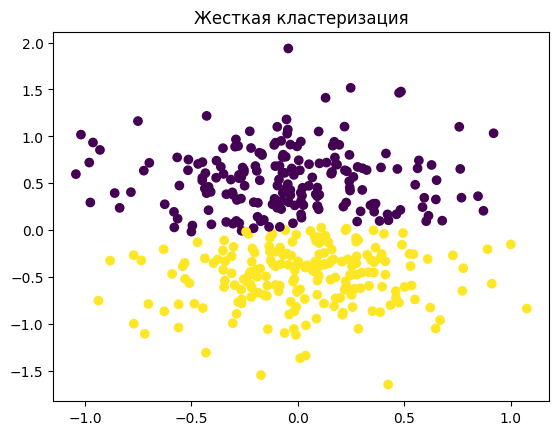

In [326]:
plt.scatter(*X2.T, c=q.argmax(axis=0))
plt.title('Жесткая кластеризация')
plt.show()

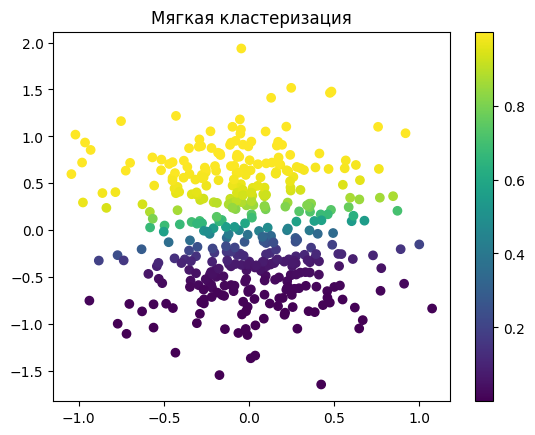

In [334]:
plt.scatter(*X2.T, c=q[0])
plt.title('Мягкая кластеризация')
plt.colorbar()
plt.show()

__Ваш вывод:__ жесткая кластеризация не позволяет увидеть пограничные точки, которые находятся близко к другим кластерам. В случае мягкой видно те области, где есть возможное пересечение.

### Тестирование EM-алгоритма на данных с изображениями

Теперь протестируем реализацию на данных изображений цифр. Будем использовать стандартный набор данных digits. Нормируем данные (для численной устойчивости) и обрежем рамку толщиной один пиксель (также для численной устойчивости).

In [329]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [330]:
digits = load_digits()
X_dig = digits["data"]
y_dig = digits["target"]
X_dig.shape

(1797, 64)

In [331]:
scaler = StandardScaler()
X_dig_sc = scaler.fit_transform(X_dig)

In [332]:
X_dig_cr = X_dig_sc.reshape(-1, 8, 8)[:, 1:-1, 1:-1].\
                    reshape(X_dig_sc.shape[0], -1)

__Задание 4 (2 балла)__ Примените EM-алгоритм к данным, использовав число гауссиан, равное 10.

Изобразите средние всех десяти гауссиан в виде изображений 6x6, подписав (в plt.title) номер гауссианы. Напечатайте, к какому кластеру отнесены первые 10 объектов выборки. Напечатайте их классы согласно данным. Можно ли сказать, что какие-то кластеры соответствуют конкретным цифрам? Какие? Приветствуется другой анализ визуализации. Может потребоваться перезапустить EM-алгоритм.

In [337]:
# your code here
gmm = GMM(num_clusters=10, num_iters=1000)
q = gmm.fit_transform(X_dig_cr)

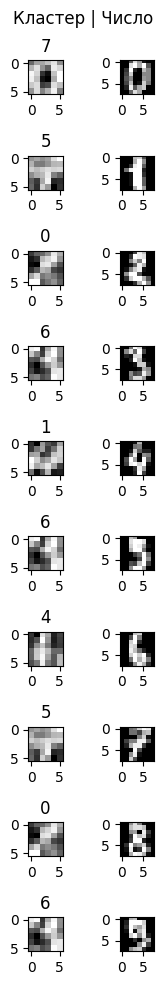

In [356]:
fig, axs = plt.subplots(10, 2)
fig.set_size_inches(2, 10)
fig.suptitle('Кластер | Число')
top10_values = q[:10, :].argmax(0)[:10]
for i, digit in enumerate(top10_values):
    center = gmm.mu[digit, :].reshape(6, 6)
    axs[i][0].set_title(digit)
    axs[i][0].imshow(center)
    axs[i][1].imshow(digits.images[i])
plt.tight_layout()

In [357]:
# перезапуск алгоритма
# your code here
gmm = GMM(num_clusters=10, num_iters=1000)
q = gmm.fit_transform(X_dig_cr)

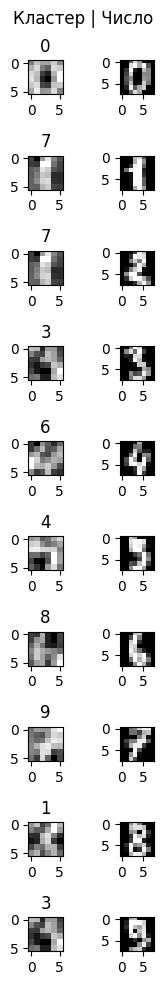

In [362]:
fig, axs = plt.subplots(10, 2)
fig.set_size_inches(2, 10)
fig.suptitle('Кластер | Число')
top10_values = q[:10, :].argmax(0)[:10]
for i, digit in enumerate(top10_values):
    center = gmm.mu[digit, :].reshape(6, 6)
    axs[i][0].set_title(digit)
    axs[i][0].imshow(center)
    axs[i][1].imshow(digits.images[i])
plt.tight_layout()

__Выводы:__ видно, что при перезапуске программы тем же цифрам в большинстве случаев соответствуют другие кластеры. Алгоритм нельзя считать идеальным, так как средние некоторых кластеров не похожи на соответствующие им цифры.